### The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors.

#### Data Description: 
 * Tilte : Title of the book
 * Author : Name of the Author
 * Edition : Type and Date of the Edition
 * Reviews : Review of the book out of 5.0
 * Ratings : Customer Ratings
 * Synopsis : The synopsis of the book
 * Genre : The theme of the story
 * BookCategory : Category under which the book falls
 * Price : Price of the book

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",50)
plt.rcParams["figure.figsize"] = [20,10]

In [2]:
booktrain = pd.read_excel("BookData_Train.xlsx")
booktrain.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
booktest = pd.read_excel("BookData_Test.xlsx")
booktest.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [4]:
booktrain.shape, booktest.shape

((6237, 9), (1560, 8))

In [5]:
booktrain.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [6]:
booktest.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [7]:
booktrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
book = pd.concat([booktrain,booktest],ignore_index = True)
book.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [9]:
book.shape

(7797, 9)

In [10]:
book.isnull().sum()

Title              0
Author             0
Edition            0
Reviews            0
Ratings            0
Synopsis           0
Genre              0
BookCategory       0
Price           1560
dtype: int64

### Univariate Analysis

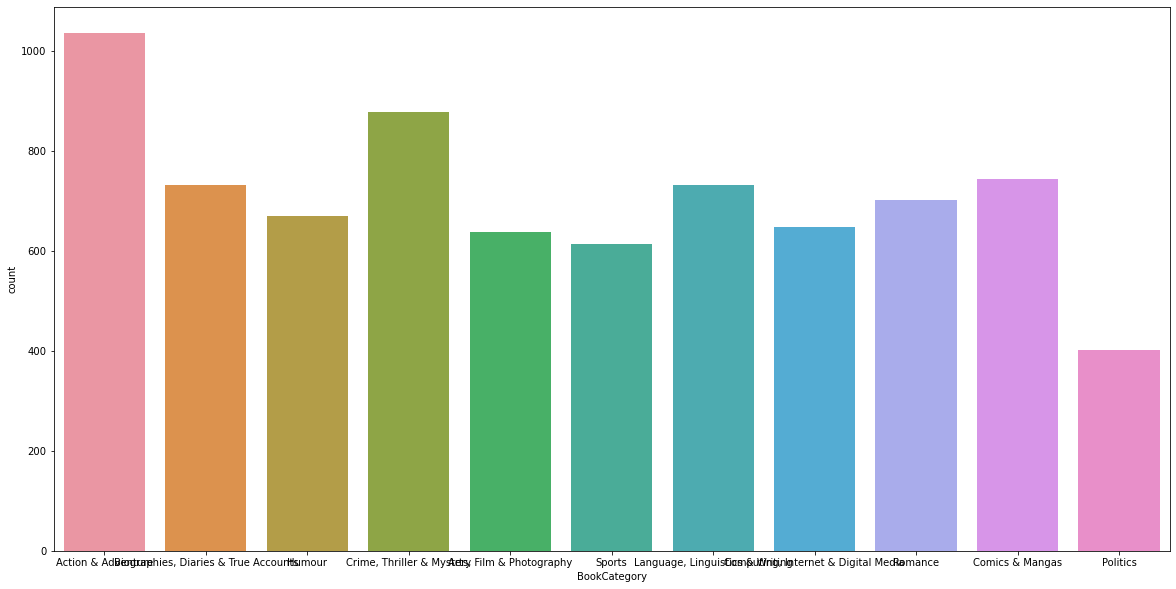

In [11]:
sns.countplot(book.BookCategory)
plt.show()

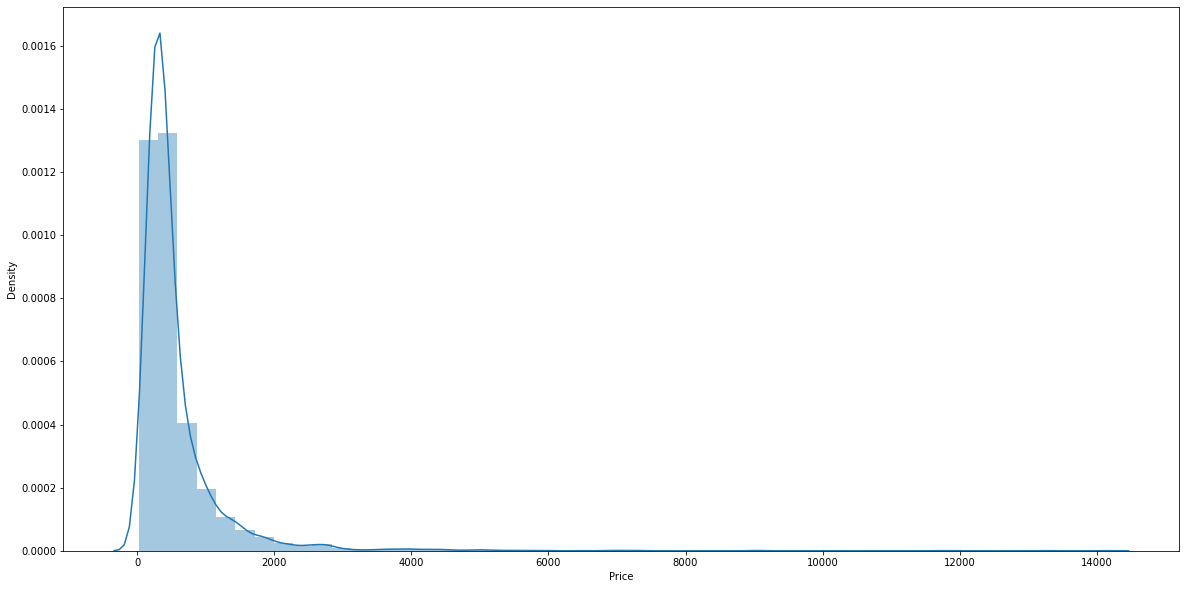

In [12]:
sns.distplot(book.Price)
plt.show()

### Bivariate Analysis

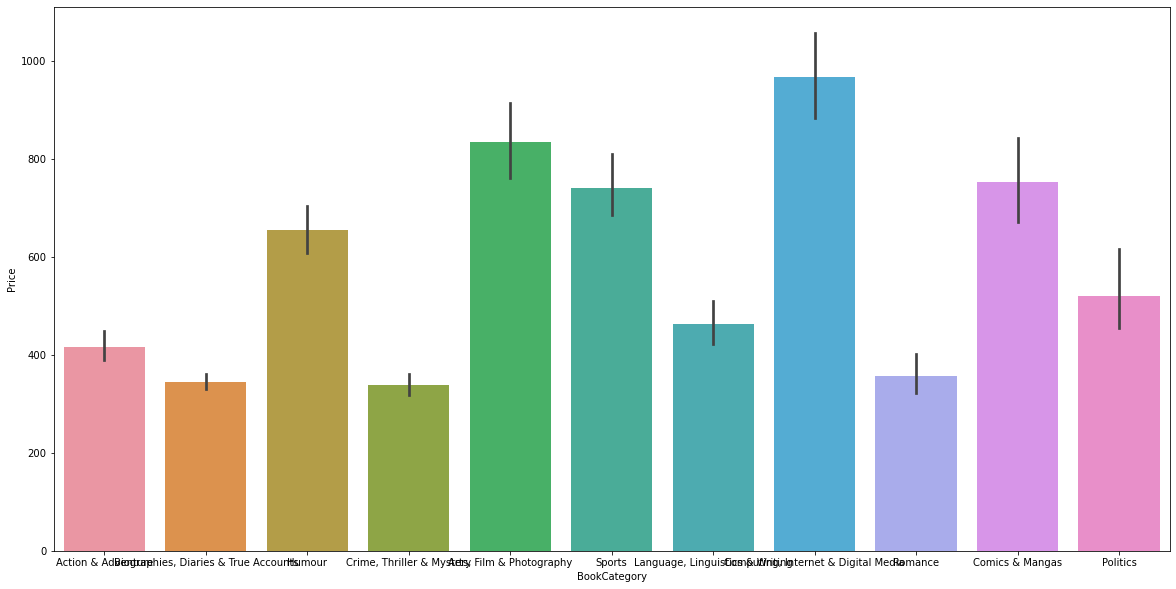

In [13]:
sns.barplot(x="BookCategory",y="Price",data=book)
plt.show()

### Feature Engineering

* Edition

In [14]:
book.head(1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.0


In [15]:
book[["Type","Date"]] = book.Edition.str.split(',– ',expand=True)

In [16]:
book["Type"].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback', '(Chinese),Paperback'], dtype=object)

* Review 

In [17]:
book["Review(out of 5)"] = book.Reviews.str.split(" out",expand=True)[0]

* Ratings

In [18]:
book["Customer Rating"] = book.Ratings.str.split(" customer",expand=True)[0]

* Type

In [19]:
book["Type"].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback', '(Chinese),Paperback'], dtype=object)

In [20]:
pbtypes =['(Kannada),Paperback','(German),Paperback','(French),Paperback','(Spanish),Paperback', '(Chinese),Paperback',
          'Mass Market Paperback','Perfect Paperback']
def mytype(x):
    if x in pbtypes:
        return("Paperback")
    else:
        return(x)
book["Type"] = book.Type.apply(mytype)

* Date

In [21]:
pd.DataFrame(book["Date"].unique())

,0
0,10 Mar 2016
1,7 Nov 2012
2,25 Feb 1982
3,5 Oct 2017
4,10 Oct 2006
...,...
3327,18 Nov 2017
3328,"Import, 15 Apr 2019"
3329,27 Oct 2005
3330,2 Jul 1999


In [22]:
book.head(1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type,Date,Review(out of 5),Customer Rating
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.0,Paperback,10 Mar 2016,4.0,8


In [23]:
# book["Type1"]=np.where(~book["Date"].str[0].str.isdigit(),book["Type"] + str(book["Edition"].str.split(',')[0]),
#                                   book["Type"])

In [24]:
mon=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
notmon='Deckle'

In [25]:
book["Temp"]=book[(~book["Date"].str[0].str.isdigit()) & (len(book["Date"].str.split(', '))>1) & (~book["Date"].str[:3].isin(mon))|(book["Date"].str[:6]==notmon)]["Date"].apply(lambda x:x.split(',')[0])

In [26]:
book["Temp"].unique()

array([nan, 'Import', 'Deckle Edge', 'Box set', 'International Edition',
       'Unabridged', 'Special Edition', 'Student Edition', 'Illustrated',
       'Abridged', 'DVD', 'Bargain Price', 'Large Print', 'Audiobook',
       'Print', 'Facsimile', 'Deluxe Edition', 'Kindle eBook',
       'EveryBook', 'ADPCM'], dtype=object)

In [27]:
book["Type1"]=book["Type"]+','+book["Temp"].fillna('')

In [28]:
book["Type1"].unique()

array(['Paperback,', 'Hardcover,', 'Hardcover,Import', 'Paperback,Import',
       'Hardcover,Deckle Edge', 'Paperback,Box set', 'Sheet music,Import',
       'Paperback,International Edition', 'Paperback,Unabridged',
       'Paperback,Special Edition', 'Paperback,Student Edition',
       'Flexibound,Import', 'Sheet music,', 'Paperback,Illustrated',
       'Paperback,Abridged', 'Hardcover,Illustrated', 'Plastic Comb,DVD',
       'Paperback,Bargain Price', 'Paperback,Deckle Edge', 'Loose Leaf,',
       'Paperback,Large Print', 'Hardcover,Special Edition',
       'Tankobon Softcover,', 'Flexibound,', 'Paperback,Audiobook',
       'Paperback,Print', 'Hardcover,Abridged', 'Board book,',
       'Hardcover,Audiobook', 'Hardcover,Facsimile', 'Cards,',
       'Spiral-bound,', 'Product Bundle,', 'Library Binding,',
       'Cards,Illustrated', 'Hardcover,Deluxe Edition',
       'Paperback,Kindle eBook', 'Tankobon Softcover,Import',
       'Hardcover,Box set', 'Leather Bound,Import',
       'Hardco

In [29]:
# book["TempDate"]=book[(book["Date"].str[:3].isin(mon))&(book["Date"].str[:6]!=notmon)]["Date"]

In [30]:
# book["TempDate"].unique()

In [31]:
# book[book["Date"].str[:6]=='Deckle'].head(1)

In [32]:
book["TempDate1"]=np.nan

In [33]:
book["TempDate1"].isnull().sum()

7797

In [34]:
for i in book.index[(book["TempDate1"].isnull())&(book["Date"].str[0].str.isalpha()&(~(book["Date"].str[:3].isin(mon))))]:
    if((book["Date"][i][:6]!='Deckle')&(book["Date"][i].split(',')[1].replace(' ','')[0].isdigit())):
        book["TempDate1"][i]=book["Date"][i].split(',')[1]
        #continue
    elif((book["Date"][i][:6]!='Deckle')&(book["Date"][i].split(',')[1].replace(' ','')[:3] in mon)):
        book["TempDate1"][i]=book["Date"][i].split(',')[1]
        #continue
    elif((book["Date"][i].replace(' ','')[:6]=='Deckle')):
        print(book["Date"][i].split(',')[1])
    #|(book["Date"].str[:6]==notmon)]["Date"].apply(lambda x : x.split(',')[1])

In [35]:
book["TempDate1"].isnull().sum()

6846

In [36]:
book["TempDate1"].unique()

array([nan, ' 1 Mar 2018', ' 14 Jun 2018', ' 4 Oct 2018', ' 15 Jun 2014',
       ' 12 Jan 2017', ' 7 Jun 2018', ' 24 Aug 2018', ' 7 Mar 2013',
       ' 27 Sep 2018', ' 1 Nov 2007', ' 6 May 2008', ' 7 Jun 2012',
       ' 5 Jul 2018', ' 29 May 2018', ' 25 Mar 2019', ' 14 Jun 2016',
       ' 2018', ' 14 Jan 2016', ' 2 Oct 2018', ' 3 Jan 2008',
       ' 16 Mar 2018', ' 5 Jul 1996', ' 22 Mar 2018', ' 16 Feb 2019',
       ' 5 Mar 2013', ' 30 Jan 2018', ' 30 Nov 2017', ' 30 Jul 2015',
       ' 5 Oct 2017', ' 23 Mar 2018', ' 24 Sep 2014', ' 29 Sep 2016',
       ' 26 Oct 2018', ' 5 Dec 2017', ' 20 Dec 2016', ' 29 Dec 2011',
       ' 12 Apr 2012', ' 21 Aug 2018', ' 25 Oct 2017', ' 12 Jul 2018',
       ' 19 Jun 1991', ' 7 Sep 2017', ' 4 May 2017', ' 28 Nov 2017',
       ' 24 Oct 2017', ' 1 Nov 2018', ' 9 Oct 2018', ' 27 Nov 2017',
       ' 1 Jan 1981', ' 25 Feb 2019', ' 2014', ' 6 Oct 2015',
       ' 7 Jul 2016', ' 12 Apr 2019', ' 25 Jan 2018', ' 19 Jun 2018',
       ' 1 Sep 2018', ' 1 Nov 2005',

In [37]:
for i in book.index[(book["TempDate1"].isnull())&(book["Date"].str[0].str.isalpha()&((book["Date"].str[:3].isin(mon))))]:
#     print(book["Date"][i].split(','))
    if((book["Date"][i][:6]!='Deckle')&(book["Date"][i].split(' ')[0].replace(' ','') in mon)):
        book["TempDate1"][i]=book["Date"][i]
#         #continue
    elif((book["Date"][i][:6]=='Deckle')&(book["Date"][i].split(',')[1].split(' ')[2][:3] in mon)):
         book["TempDate1"][i]=book["Date"][i].split(',')[1]
#         #continue
#     elif((book["Date"][i].replace(' ','')[:6]=='Deckle')):
#         print(book["Date"][i].split(',')[1])

In [38]:
book["TempDate1"].isnull().sum()

6736

In [39]:
book[book["Date"]=='2014']

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type,Date,Review(out of 5),Customer Rating,Temp,Type1,TempDate1
223,Cambridge Advanced Learners Dictionary (CD-ROM),Cup,"Paperback,– 2014",4.4 out of 5 stars,74 customer reviews,ELT - Reference and Dictionaries.,Dictionaries,"Language, Linguistics & Writing",659.0,Paperback,2014,4.4,74,NaN,"Paperback,",NaN
307,Practical Workflow for SAP,Jocelyn Dart,"Hardcover,– 2014",3.9 out of 5 stars,9 customer reviews,One resource. All of your SAP Business Workflo...,Software & Business Applications (Books),"Computing, Internet & Digital Media",2275.0,Hardcover,2014,3.9,9,NaN,"Hardcover,",NaN
652,Introduction to Data Mining with Case Studies,Gupta G.K,"Paperback,– 2014",4.1 out of 5 stars,7 customer reviews,The field of data mining provides techniques f...,Economics Textbooks,"Computing, Internet & Digital Media",280.0,Paperback,2014,4.1,7,NaN,"Paperback,",NaN
1654,112 Meditations for Self Realization: Vigyan B...,Ranjit Chaudhri,"Paperback,– 2014",4.2 out of 5 stars,26 customer reviews,The Vigyan Bhairava Tantra is one of yoga's mo...,Action & Adventure (Books),Action & Adventure,199.0,Paperback,2014,4.2,26,NaN,"Paperback,",NaN
1850,1984,George Orwell,"Paperback,– 2014",4.5 out of 5 stars,862 customer reviews,Regarded as a great instance of twentieth cent...,Action & Adventure (Books),Action & Adventure,94.0,Paperback,2014,4.5,862,NaN,"Paperback,",NaN
2338,English Speaking Course,"Gupta, R.K","(Kannada),Paperback,– 2014",4.2 out of 5 stars,53 customer reviews,Product Dimensions: 9.4 x 7.2 x 0.7 inches Des...,Language Learning & Teaching (Books),"Language, Linguistics & Writing",93.0,Paperback,2014,4.2,53,NaN,"Paperback,",NaN
2557,Artificial Intelligence and Machine Learning,Chandra S.S.V,"Paperback,– 2014",4.1 out of 5 stars,5 customer reviews,Primarily intended for the undergraduate and p...,Computer Science Books,"Computing, Internet & Digital Media",355.0,Paperback,2014,4.1,5,NaN,"Paperback,",NaN
2580,"The Graveyard Book Graphic Novel, Part - 1",Neil Gaiman,"Paperback,– 2014",4.6 out of 5 stars,109 customer reviews,An irresistibly brilliant graphic novel adapta...,Comics & Mangas (Books),Comics & Mangas,311.0,Paperback,2014,4.6,109,NaN,"Paperback,",NaN
2613,112 Meditations for Self Realization: Vigyan B...,Ranjit Chaudhri,"Paperback,– 2014",4.1 out of 5 stars,25 customer reviews,The Vigyan Bhairava Tantra is one of yoga's mo...,Action & Adventure (Books),Action & Adventure,199.0,Paperback,2014,4.1,25,NaN,"Paperback,",NaN
2907,Sherlock Holmes - The Complete Novels & Storie...,Arthur Conan Doyle,"Paperback,– 2014",4.5 out of 5 stars,137 customer reviews,Meet the world’s favorite detective-Sherlock H...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",375.0,Paperback,2014,4.5,137,NaN,"Paperback,",NaN


In [40]:
book["TempDate1"].isnull().sum()

6736

In [41]:
for i in book.index[(book["TempDate1"].isnull())&(book["Date"].str[0].str.isdigit())]:
    if(len(book["Date"][i])==4):
        book["TempDate1"][i]=book["Date"][i]
    elif(len(book["Date"][i])>4):
        book["TempDate1"][i]=book["Date"][i]

In [42]:
book['TempDate1'].unique()

array(['10 Mar 2016', '7 Nov 2012', '25 Feb 1982', ..., '27 Oct 2005',
       '2 Jul 1999', '16 Sep 2016'], dtype=object)

In [43]:
book["TempDate1"].isnull().sum()

30

In [44]:
book[book["TempDate1"].isnull()].head(38)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type,Date,Review(out of 5),Customer Rating,Temp,Type1,TempDate1
169,Long Walk to Freedom: Illustrated Children's e...,Nelson Mandela,"Paperback,– Abridged, Import",5.0 out of 5 stars,2 customer reviews,Long Walk to Freedom by Nelson Mandela is the ...,Action & Adventure (Books),Action & Adventure,418.0,Paperback,"Abridged, Import",5.0,2,Abridged,"Paperback,Abridged",NaN
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,"Plastic Comb,– DVD, NTSC",3.9 out of 5 stars,6 customer reviews,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",1453.0,Plastic Comb,"DVD, NTSC",3.9,6,DVD,"Plastic Comb,DVD",NaN
582,Fundamentals of Drawing Portraits: A Practical...,Barrington Barber,"Paperback,– Illustrated, Import",4.0 out of 5 stars,7 customer reviews,This book is essential for everyone who wants ...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",415.0,Paperback,"Illustrated, Import",4.0,7,Illustrated,"Paperback,Illustrated",NaN
972,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden","Paperback,– Illustrated, Import",3.0 out of 5 stars,1 customer review,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)",Comics & Mangas,445.0,Paperback,"Illustrated, Import",3.0,1,Illustrated,"Paperback,Illustrated",NaN
1233,Amma Tell Me About Raksha Bandhan!,Bhakti Mathur,"Paperback,– Large Print, Import",5.0 out of 5 stars,1 customer review,A promise to love and to protect\nIs sealed by...,Action & Adventure (Books),Action & Adventure,277.0,Paperback,"Large Print, Import",5.0,1,Large Print,"Paperback,Large Print",NaN
1558,Figure it out for Yourself,James Hadley Chase,"Hardcover,– Import, Facsimile",5.0 out of 5 stars,1 customer review,Serena Marshland was the fourth richest woman ...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",100.0,Hardcover,"Import, Facsimile",5.0,1,Import,"Hardcover,Import",NaN
1605,"An Introduction to Linguistics: Language, Gram...",Syal,"Paperback,– Abridged, Audiobook, Box set",4.1 out of 5 stars,29 customer reviews,"This compact and engagingly elegant text, now ...",Engineering,"Language, Linguistics & Writing",399.0,Paperback,"Abridged, Audiobook, Box set",4.1,29,Abridged,"Paperback,Abridged",NaN
1631,Swimming: Swimming Made Easy: Beginner and Exp...,Ace McCloud,"Paperback,– Large Print, Import",4.0 out of 5 stars,1 customer review,Are you tired of being a weak swimmer? Do less...,"Swimming, Snorkelling & Diving (Books)",Sports,709.0,Paperback,"Large Print, Import",4.0,1,Large Print,"Paperback,Large Print",NaN
1643,The Merchant of Venice (Text with Paraphrase) ...,William Shakespeare,"Paperback,– Student Edition, Special Edition",3.9 out of 5 stars,58 customer reviews,Introduce the students to William Shakespeare’...,Theater,"Arts, Film & Photography",220.0,Paperback,"Student Edition, Special Edition",3.9,58,Student Edition,"Paperback,Student Edition",NaN
1769,The Human Face of Big Data,Rick Smolan,"Hardcover,– Abridged, Audiobook, Box set",5.0 out of 5 stars,1 customer review,The images and stories captured in The Human F...,Computer Science Books,"Computing, Internet & Digital Media",2248.0,Hardcover,"Abridged, Audiobook, Box set",5.0,1,Abridged,"Hardcover,Abridged",NaN


In [45]:
book["Date"][25].split(',')[1].split(' ')[2][:3]

'Oct'

In [46]:
book["TempDate1"].isnull().sum()

30

In [47]:
book["TempDate1"][7][0].isdigit()

False

In [48]:
book["Month"] = ' '
book["Year"] = ' '
book["N_Date"]= ' '
for i in book.index[book["TempDate1"].str.lstrip().str.len()==4]:
    #print(book["TempDate1"][i].lstrip())
    book["Year"][i]=book["TempDate1"][i].lstrip()
for i in book.index[((book["Year"]==' ')&(book["Month"]==' ')
                    &(book["TempDate1"].str.lstrip().str.len()>4)&(book["TempDate1"].str[:3].isin(mon)))]:
#     print(book["TempDate1"][i].lstrip())
     book["Year"][i]=book["TempDate1"][i].lstrip().split(' ')[1]
     book["Month"][i]=book["TempDate1"][i].lstrip().split(' ')[0]
#     print(book["TempDate1"][i].lstrip().split(' ')[0])
for i in book.index[((book["Year"]==' ')&(book["Month"]==' ')&(book["TempDate1"].str.lstrip().str.len()>4)&
                    (~book["TempDate1"].str[:3].isin(mon))&(book["TempDate1"].str.lstrip().str[0].str.isdigit()))]:
#      print(book["TempDate1"][i].lstrip())
    book["Month"][i]=book["TempDate1"][i].lstrip().split(' ')[1]
    book["N_Date"][i]=book["TempDate1"][i].lstrip().split(' ')[0]
    book["Year"][i]=book["TempDate1"][i].lstrip().split(' ')[2]


#     elif len(i)==4:
#         book["Year"]=book["Year"].append(a)
#     else:
#         book["Month"]=np.nan
#         book["Year"]=np.nan

In [49]:
book.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Type,Date,Review(out of 5),Customer Rating,Temp,Type1,TempDate1,Month,Year,N_Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10 Mar 2016,4.0,8,NaN,"Paperback,",10 Mar 2016,Mar,2016,10
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012,3.9,14,NaN,"Paperback,",7 Nov 2012,Nov,2012,7
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982,4.8,6,NaN,"Paperback,",25 Feb 1982,Feb,1982,25
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017,4.1,13,NaN,"Paperback,",5 Oct 2017,Oct,2017,5
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006,5.0,1,NaN,"Hardcover,",10 Oct 2006,Oct,2006,10


In [50]:
book.isnull().sum()

Title                  0
Author                 0
Edition                0
Reviews                0
Ratings                0
Synopsis               0
Genre                  0
BookCategory           0
Price               1560
Type                   0
Date                   0
Review(out of 5)       0
Customer Rating        0
Temp                6808
Type1                  0
TempDate1             30
Month                  0
Year                   0
N_Date                 0
dtype: int64

In [51]:
book.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Type', 'Date', 'Review(out of 5)',
       'Customer Rating', 'Temp', 'Type1', 'TempDate1', 'Month', 'Year',
       'N_Date'],
      dtype='object')

In [52]:
book.drop(['Title','Edition', 'Reviews', 'Ratings', 'Synopsis','Type', 'Date', 'Temp', 'TempDate1','N_Date'],
          axis=1,inplace=True)

In [53]:
book.shape

(7797, 9)

In [54]:
book.columns

Index(['Author', 'Genre', 'BookCategory', 'Price', 'Review(out of 5)',
       'Customer Rating', 'Type1', 'Month', 'Year'],
      dtype='object')

In [55]:
book.dtypes

Author               object
Genre                object
BookCategory         object
Price               float64
Review(out of 5)     object
Customer Rating      object
Type1                object
Month                object
Year                 object
dtype: object

### Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()
book["Author"] = le.fit_transform(book["Author"])
book["Genre"] = le.fit_transform(book["Genre"])
book["BookCategory"] = le.fit_transform(book["BookCategory"])
book["Review(out of 5)"] = le.fit_transform(book["Review(out of 5)"])
book["Customer Rating"] = le.fit_transform(book["Customer Rating"])
book["Type1"] = le.fit_transform(book["Type1"])
book["Year"] = le.fit_transform(book["Year"])

In [58]:
book["Month"].unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', ' ', 'Aug', 'Apr'], dtype=object)

In [59]:
book["Month"] = book["Month"].map({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,
                                  "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12," ":0})

In [60]:
book.head()

,Author,Genre,BookCategory,Price,Review(out of 5),Customer Rating,Type1,Month,Year
0,748,1,0,220.00,25,324,20,3,55
1,370,78,2,202.93,24,57,20,11,51
2,4045,202,6,299.00,33,286,20,2,21
3,79,96,5,180.00,26,47,20,10,56
4,1138,264,1,965.62,35,0,5,10,45


In [61]:
book.dtypes

Author                int32
Genre                 int32
BookCategory          int32
Price               float64
Review(out of 5)      int32
Customer Rating       int32
Type1                 int32
Month                 int64
Year                  int32
dtype: object

In [62]:
book.isnull().sum()

Author                 0
Genre                  0
BookCategory           0
Price               1560
Review(out of 5)       0
Customer Rating        0
Type1                  0
Month                  0
Year                   0
dtype: int64

In [63]:
book[book["Price"].isnull()]

,Author,Genre,BookCategory,Price,Review(out of 5),Customer Rating,Type1,Month,Year
6237,3769,304,5,NaN,29,361,20,10,25
6238,1303,255,4,NaN,35,0,29,4,57
6239,887,294,9,NaN,35,231,20,3,50
6240,166,275,4,NaN,26,25,20,0,55
6241,3261,219,7,NaN,29,350,20,12,50
...,...,...,...,...,...,...,...,...,...
7792,3935,103,4,NaN,35,231,20,4,50
7793,27,72,2,NaN,21,47,20,5,52
7794,2159,186,6,NaN,25,264,20,9,50
7795,1517,347,2,NaN,20,185,20,9,48


### Splitting the train and test data

In [64]:
newtrain = book.iloc[0:booktrain.shape[0]-1,:]
newtest = book.iloc[booktrain.shape[0]:,:]
newtrain.shape,newtest.shape,booktrain.shape,booktest.shape

((6236, 9), (1560, 9), (6237, 9), (1560, 8))

In [65]:
newtest.drop(columns='Price',axis=1,inplace=True)

In [66]:
newtrain.shape,newtest.shape,booktrain.shape,booktest.shape

((6236, 9), (1560, 8), (6237, 9), (1560, 8))

In [67]:
train = newtrain.astype({'Author':'int','Genre':'int','BookCategory':'int','Price':'int','Review(out of 5)':'int',
                      'Customer Rating':'int','Type1':'int','Month':'int','Year':'int'})
test = newtest.astype({'Author':'int','Genre':'int','BookCategory':'int','Review(out of 5)':'int', 'Customer Rating':'int',
                   'Type1':'int','Month':'int','Year':'int'})

In [68]:
train.dtypes

Author              int32
Genre               int32
BookCategory        int32
Price               int32
Review(out of 5)    int32
Customer Rating     int32
Type1               int32
Month               int32
Year                int32
dtype: object

In [69]:
test.dtypes

Author              int32
Genre               int32
BookCategory        int32
Review(out of 5)    int32
Customer Rating     int32
Type1               int32
Month               int32
Year                int32
dtype: object

In [70]:
train.isnull().sum()

Author              0
Genre               0
BookCategory        0
Price               0
Review(out of 5)    0
Customer Rating     0
Type1               0
Month               0
Year                0
dtype: int64

In [71]:
test.isnull().sum()

Author              0
Genre               0
BookCategory        0
Review(out of 5)    0
Customer Rating     0
Type1               0
Month               0
Year                0
dtype: int64

In [72]:
y_train = train.pop('Price')
X_train = train

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred_train = lr.predict(X_train)
print("Train RMSE : ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train r2_score : ",r2_score(y_train,ypred_train))

Train RMSE :  672.7427466691312
Train r2_score :  0.04967894125383776


In [75]:
y_test_pred = lr.predict(test)

In [76]:
y_test_pred = pd.DataFrame(y_test_pred,columns=['Price'])

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dt = DecisionTreeRegressor()
dtpred = dt.fit(X_train,y_train).predict(X_train)
print("r2_score : ",r2_score(y_train,dtpred))

r2_score :  0.9939274352392202


In [79]:
final = dt.predict(test)
final =  pd.DataFrame(final,columns=['Price'])

In [81]:
finalpred = pd.DataFrame(final).T.mode(axis = 1)

In [83]:
final.to_csv('FinalModel.csv',index=False)